# Logistic regression
## binary response variables (Y)- 0 or 1
## Xs can be numerical or categorical

In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm


C:\Users\Minerva\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [44]:
df = pd.read_csv("trainT.csv") #titanic 

In [45]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.shape

(891, 12)

In [46]:
df.isnull().sum() #number of nas in a column

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [47]:
df = df[["Survived","Pclass","Age","Fare"]]

In [48]:
df=df.dropna() #drops nas

In [49]:
df.head(7)

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500
6,0,1,54.0,51.8625
7,0,3,2.0,21.0750


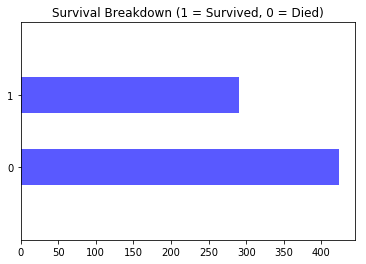

In [15]:
plt.figure(figsize=(6,4))
fig, ax = plt.subplots()
df.Survived.value_counts().plot(kind='barh', color="blue", alpha=.65)
ax.set_ylim(-1, len(df.Survived.value_counts())) 
plt.title("Survival Breakdown (1 = Survived, 0 = Died)")

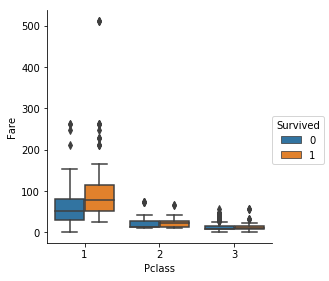

In [22]:
sns.factorplot(x="Pclass", y="Fare", hue="Survived", data=df, kind="box")

In [16]:
#formula = 'Survived ~ C(Pclass) + C(Sex) + Age + Fare'  #c indicates categorical

In [50]:
y=df[['Survived']]

In [39]:
print(type(y))

<class 'pandas.core.frame.DataFrame'>


In [51]:
x=df[["Pclass","Age","Fare"]]

In [52]:
print(type(x))

<class 'pandas.core.frame.DataFrame'>


In [53]:
# Make the model
logit =sm.Logit(y, x.astype(float)) #import statsmodels.api as sm
 
# Fit the model
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.608663
         Iterations 6


In [54]:
print result.summary()

                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  714
Model:                          Logit   Df Residuals:                      711
Method:                           MLE   Df Model:                            2
Date:                Tue, 08 Aug 2017   Pseudo R-squ.:                 0.09885
Time:                        01:45:22   Log-Likelihood:                -434.59
converged:                       True   LL-Null:                       -482.26
                                        LLR p-value:                 1.978e-21
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Pclass        -0.2803      0.054     -5.146      0.000      -0.387      -0.174
Age           -0.0108      0.005     -2.351      0.019      -0.020      -0.002
Fare           0.0146      0.002      5.879      0.0

In [ ]:
#log [p/(1-p)] = -.28*Pclass + .0146 * faree -0.01*Age

In [ ]:
#how a 1 unit increase or decrease in a variable affects the odds of surviving
#Number of successes:1 failure

In [55]:
  # odds
  print np.exp(result.params)

Pclass    0.755585
Age       0.989267
Fare      1.014718
dtype: float64


In [ ]:
#odds that passengers die increase by a factor of 0.98 for each unit change in age.

In [ ]:
#prob = odds / (1 + odds) .
#probability of finding someone dead on basis of age = 0.98/(1+0.98)

In [56]:

from patsy import dmatrices
import pandas as pd
from sklearn.linear_model import LogisticRegression
import statsmodels.discrete.discrete_model as sm


In [57]:
df2=pd.read_csv("trainT.csv") 

In [58]:
df2.head(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


In [59]:
df2 = df2[["Survived","Pclass","Sex","Age","Fare"]]

In [61]:
df2.head(6)

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
5,0,3,male,NaN,8.4583


In [62]:
df2=df2.dropna()

In [63]:
df2.head(6)

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
6,0,1,male,54.0,51.8625


In [64]:
y, X = dmatrices('Survived ~ C(Pclass) + C(Sex) + Age + Fare', df2, return_type = 'dataframe')
#c indicates categorical

# sklearn output
model = LogisticRegression(fit_intercept = False, C = 1e9)
mdl = model.fit(X, y)
model.coef_


C:\Users\Minerva\Anaconda2\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[  3.72029608e+00,  -1.27581590e+00,  -2.54014970e+00,
         -2.51746792e+00,  -3.67112781e-02,   5.27145429e-04]])

In [65]:
logit = sm.Logit(y, X)
logit.fit().params

Optimization terminated successfully.
         Current function value: 0.453242
         Iterations 6


Intercept         3.722505
C(Pclass)[T.2]   -1.276590
C(Pclass)[T.3]   -2.541576
C(Sex)[T.male]   -2.518505
Age              -0.036730
Fare              0.000523
dtype: float64

In [68]:
# Fit the model
result = logit.fit()
print result.summary()

Optimization terminated successfully.
         Current function value: 0.453242
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  714
Model:                          Logit   Df Residuals:                      708
Method:                           MLE   Df Model:                            5
Date:                Tue, 08 Aug 2017   Pseudo R-squ.:                  0.3290
Time:                        01:56:32   Log-Likelihood:                -323.61
converged:                       True   LL-Null:                       -482.26
                                        LLR p-value:                 1.919e-66
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.7225      0.465      8.014      0.000       2.812       4.633
C(Pclass)[T.2]   

In [18]:
# create a results dictionary to hold our regression results for easy analysis later        
results = {} 

In [ ]:
#http://hamelg.blogspot.co.uk/2015/11/python-for-data-analysis-part-28.html

In [19]:
# create a regression friendly dataframe using patsy's dmatrices function
y,x = dmatrices(formula, data=df, return_type='dataframe')

# instantiate our model
model = sm.Logit(y,x)

# fit our model to the training data
res = model.fit()

# save the result for outputing predictions later
results['Logit'] = [res, formula]
res.summary()

Optimization terminated successfully.
         Current function value: 0.453242
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  714
Model:                          Logit   Df Residuals:                      708
Method:                           MLE   Df Model:                            5
Date:                Tue, 08 Aug 2017   Pseudo R-squ.:                  0.3290
Time:                        01:17:14   Log-Likelihood:                -323.61
converged:                       True   LL-Null:                       -482.26
                                        LLR p-value:                 1.919e-66
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.7225      0.465      8.014      0.000       2.812       4.633
C(Pclass)[T.2]    -1.2766      0.313     -4.083      0.000      -1.889      -0.664
C(Pclass)[T.3]    -2.5416      0.328     -7.754      0.000      -3.184      -1.899
C(Sex)[T.male]    -2.5185      0.208    -12.096      0.000      -2.927      -2.110
Age               -0.0367      0.008     -4.750      0.000      -0.052      -0.022
Fare               0.0005      0.002      0.231      0.817      -0.004       0.005
==================================================================================
"""

In [ ]:
# fare is not statistically significant

In [20]:
formula = 'Survived ~ C(Pclass) + C(Sex) + Age' 

In [21]:
results = {} 
# create a regression friendly dataframe using patsy's dmatrices function
y,x = dmatrices(formula, data=df, return_type='dataframe')

# instantiate our model
model = sm.Logit(y,x)

# fit our model to the training data
res = model.fit()

# save the result for outputing predictions later
results['Logit'] = [res, formula]
res.summary()

Optimization terminated successfully.
         Current function value: 0.453279
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  714
Model:                          Logit   Df Residuals:                      709
Method:                           MLE   Df Model:                            4
Date:                Tue, 08 Aug 2017   Pseudo R-squ.:                  0.3289
Time:                        01:18:33   Log-Likelihood:                -323.64
converged:                       True   LL-Null:                       -482.26
                                        LLR p-value:                 2.074e-67
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.7770      0.401      9.416      0.000       2.991       4.563
C(Pclass)[T.2]    -1.3098      0.278     -4.710      0.000      -1.855      -0.765
C(Pclass)[T.3]    -2.5806      0.281     -9.169      0.000      -3.132      -2.029
C(Sex)[T.male]    -2.5228      0.207    -12.164      0.000      -2.929      -2.116
Age               -0.0370      0.008     -4.831      0.000      -0.052      -0.022
==================================================================================
"""